<a href="https://colab.research.google.com/github/joske-vermeulen/ML/blob/main/chapter_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai
! [ -e /content ] && pip install -Uqq fastbook

In [ ]:
import fastbook
fastbook.setup_book()
from fastbook import *

from fastai.vision.all import *


In [ ]:
torch.cuda.is_available()

True

# Image Classification

In [ ]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed = 42,
    label_func = is_cat, item_tfms=Resize(224)
)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.176137,0.025201,0.006766,00:57


epoch,train_loss,valid_loss,error_rate,time
0,0.059758,0.019946,0.009472,00:48


In [ ]:
# uploader = widgets.FileUpload()
# uploader

uploader = SimpleNamespace(data = ['/content/gdrive/MyDrive/Colab Notebooks/images/cat_01.jpeg'])

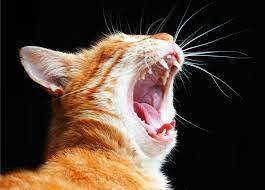

In [ ]:
img = PILImage.create(uploader.data[0])

img

In [ ]:


is_cat, _, probs = learn.predict(img)
print(is_cat)
print(probs)

True
tensor([6.9620e-09, 1.0000e+00])


# Image Segmentation

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.331577,2.250853,00:01


epoch,train_loss,valid_loss,time
0,1.858960,2.004291,00:01
1,1.588014,2.088078,00:01
2,1.581180,1.346921,00:01
3,1.445931,1.239692,00:01
4,1.327202,1.069832,00:01
5,1.215856,0.966161,00:01
6,1.113024,0.916671,00:01
7,1.030977,0.906742,00:01


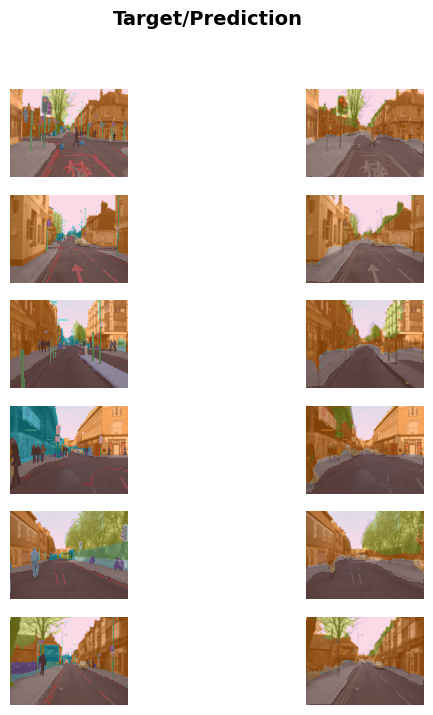

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

# Sentiment of Movie Review

In [ ]:
from fastai.text.all import *

In [ ]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

learn.fine_tune(4, 1e-2)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


epoch,train_loss,valid_loss,accuracy,time
0,0.468985,0.422967,0.803680,03:26


epoch,train_loss,valid_loss,accuracy,time
0,0.308009,0.241647,0.903520,07:07
1,0.233045,0.234177,0.908600,07:07
2,0.191057,0.216105,0.918840,07:08


In [ ]:
learn.predict

# Tabular Learner

can learn from spreadsheets; databases, CSV's

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

In [ ]:
dls = TabularDataLoaders.from_csv(
    path/'adult.csv', path=path, y_names="salary",
    cat_names=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
    cont_names= ['age', 'fnlwgt', 'education-num'],
    procs= [Categorify, FillMissing, Normalize]
    )

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

# Recommendation (movies)

In [ ]:
from fastai.collab import *

In [ ]:
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()

In [ ]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')